In [20]:
import os
import torch
###################from torchvision  import transforms  # Import the transforms module
from torchvision import transforms
############################from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
###########################import timm
import torch.optim as optim
from sklearn.model_selection import train_test_split
###################from torchvision.transforms import RandomHorizontalFlip, RandomRotation
##########################from torchvision import datasets
import torch.nn as nn
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm
import torch
import torch.optim as optim
import torch.nn as nn
###########################from tqdm import tqdm
from torch.cuda.amp import autocast, GradScaler
from sklearn.metrics import confusion_matrix
###################import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} for training")

ValueError: source code string cannot contain null bytes

In [10]:
# Define the path to your dataset
train_data_dir = r'D:\CXR8\ChestX-ray'
val_data_dir = r'D:\CXR8\ChestX-ray Test'

# Apply transformations to the images
train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load the datasets
train_dataset = datasets.ImageFolder(train_data_dir, transform=train_transforms)
val_dataset = datasets.ImageFolder(val_data_dir, transform=val_transforms)

# Define the batch size
batch_size = 12

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)  # shuffle is kept False for validation


NameError: name 'transforms' is not defined

In [3]:
import timm

# Choose a ViT model architecture (e.g., ViT Base)
model = timm.create_model("vit_base_patch16_224", pretrained=True, num_classes=8)

# Modify the model's final classification head for 8 classes
num_classes = 8
model.head = torch.nn.Linear(model.head.in_features, num_classes)


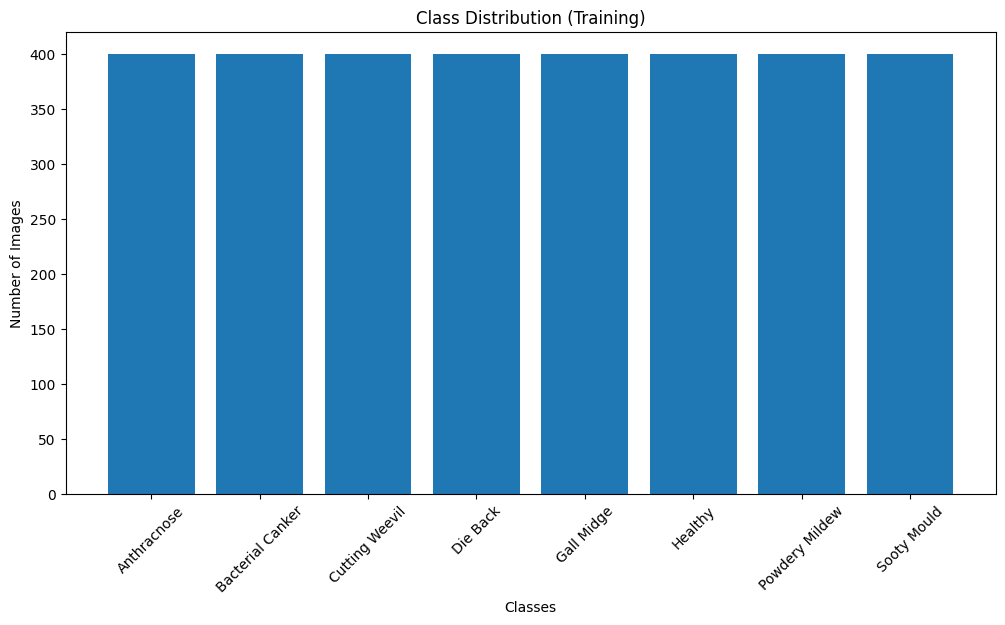

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


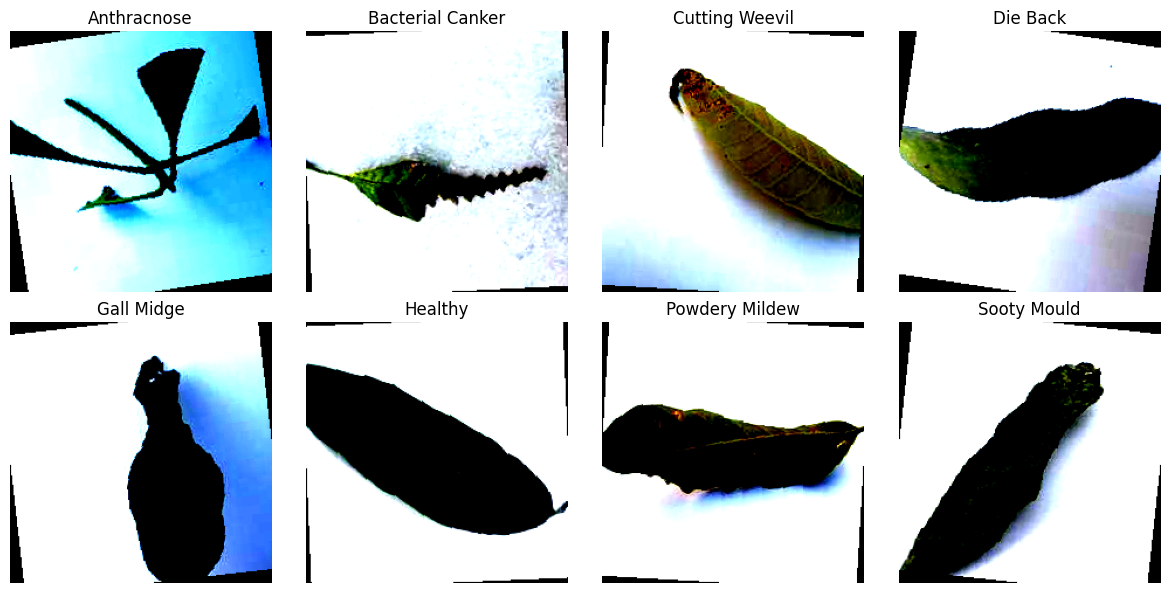

Number of classes: 8
Total number of images: 3200
Class-wise image counts:
Anthracnose: 400 images
Bacterial Canker: 400 images
Cutting Weevil: 400 images
Die Back: 400 images
Gall Midge: 400 images
Healthy: 400 images
Powdery Mildew: 400 images
Sooty Mould: 400 images


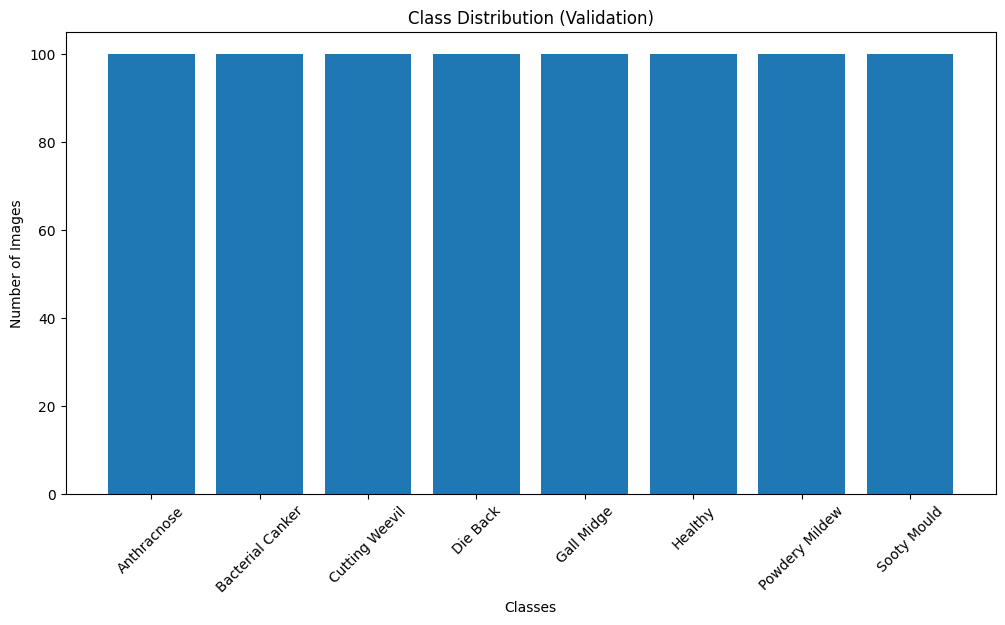

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


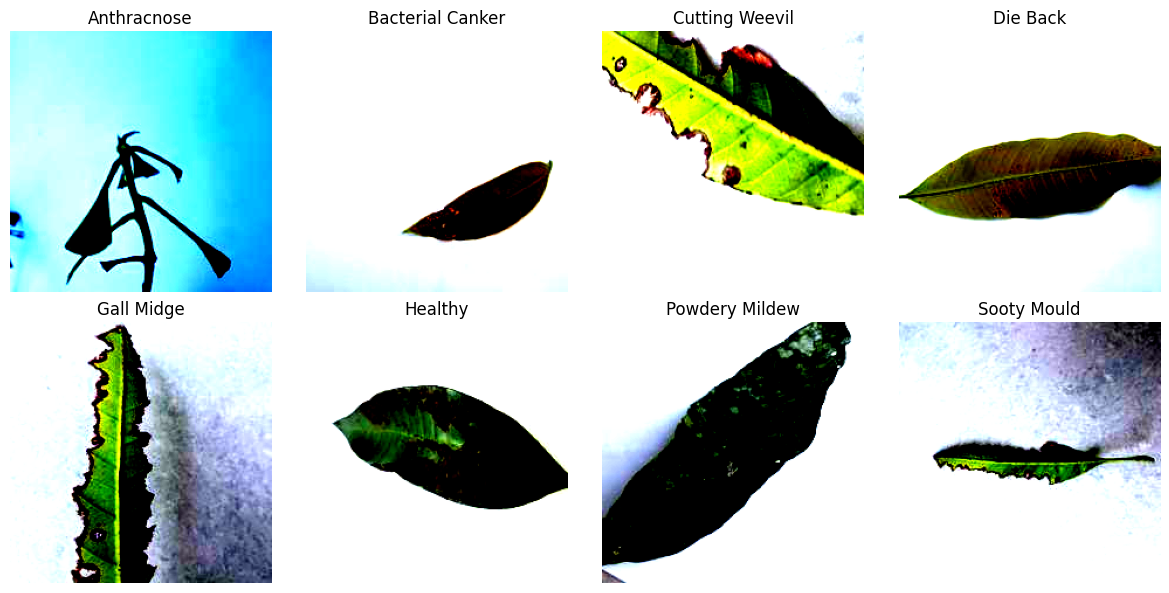

Number of classes: 8
Total number of images: 800
Class-wise image counts:
Anthracnose: 100 images
Bacterial Canker: 100 images
Cutting Weevil: 100 images
Die Back: 100 images
Gall Midge: 100 images
Healthy: 100 images
Powdery Mildew: 100 images
Sooty Mould: 100 images


In [4]:
# Function to visualize dataset statistics and sample images
def visualize_dataset_statistics(dataset, title_suffix=''):
    # Get the class names (folder names)
    class_names = dataset.classes

    # Calculate the number of classes
    num_classes = len(class_names)

    # Calculate the number of images in each class
    class_counts = [0] * num_classes
    for _, label in dataset.samples:
        class_counts[label] += 1

    # Plot the class distribution
    plt.figure(figsize=(12, 6))
    plt.bar(class_names, class_counts)
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.title(f'Class Distribution {title_suffix}')
    plt.xticks(rotation=45)
    plt.show()

    # Display sample images from each class
    plt.figure(figsize=(12, 6))
    for i in range(num_classes):
        plt.subplot(2, 4, i + 1)
        sample_image = dataset[np.random.randint(len(dataset))][0]
        plt.imshow(sample_image.permute(1, 2, 0))  # Convert from tensor to image format
        plt.title(class_names[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Print some dataset statistics
    print(f"Number of classes: {num_classes}")
    print(f"Total number of images: {len(dataset)}")
    print("Class-wise image counts:")
    for i, count in enumerate(class_counts):
        print(f"{class_names[i]}: {count} images")

# Visualize training dataset statistics
visualize_dataset_statistics(train_dataset, title_suffix='(Training)')

# Visualize validation dataset statistics
visualize_dataset_statistics(val_dataset, title_suffix='(Validation)')


In [21]:
# Augmentation transforms for both training and validation
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally
    transforms.RandomRotation(5),      # Randomly rotate images by up to 5 degrees
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create new datasets with data augmentation
train_dataset_augmented = datasets.ImageFolder(train_data_dir, transform=train_transform)
val_dataset_augmented = datasets.ImageFolder(val_data_dir, transform=val_transform)

# Create data loaders for augmented datasets
train_loader_augmented = DataLoader(train_dataset_augmented, batch_size=batch_size, shuffle=True)
val_loader_augmented = DataLoader(val_dataset_augmented, batch_size=batch_size, shuffle=False)  # Keep validation order consistent


NameError: name 'transforms' is not defined

In [6]:
import torch.nn as nn
criterion = nn.CrossEntropyLoss()

In [7]:
# Define hyperparameters
learning_rate = 0.0001

# Initialize the optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [8]:
torch.cuda.empty_cache()

In [9]:
# Initialize the GradScaler
scaler = GradScaler()

# Define the number of epochs
num_epochs = 10

# Lists to store training and validation metrics
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

if torch.cuda.is_available():
    model.cuda()
for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in tqdm(train_loader_augmented, desc=f"Epoch {epoch + 1}/{num_epochs} (Training)"):
        optimizer.zero_grad()
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

        inputs, labels = inputs.to(device), labels.to(device)  # Match the data type of the model's weights

        # Apply mixed precision
        with autocast():
            outputs = model(inputs)
            loss = criterion(outputs, labels)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader_augmented)
    train_accuracy = 100 * correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation phase (no need for mixed precision here)
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in tqdm(val_loader_augmented, desc=f"Epoch {epoch + 1}/{num_epochs} (Validation)"):
            device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

            inputs, labels = inputs.to(device), labels.to(device)  # Match the data type of the model's weights

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_loss = val_loss / len(val_loader_augmented)
    val_accuracy = 100 * correct_val / total_val
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    # Print epoch statistics
    print(f"Epoch {epoch + 1}/{num_epochs}, "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%")

# Training loop completed


Epoch 1/10 (Validation): 100%|█████████████████████████████████████████████████████████| 67/67 [00:10<00:00,  6.40it/s]


Epoch 1/10, Train Loss: 0.2970, Train Acc: 89.69%, Val Loss: 0.1960, Val Acc: 94.75%


Epoch 2/10 (Validation): 100%|█████████████████████████████████████████████████████████| 67/67 [00:07<00:00,  8.76it/s]


Epoch 2/10, Train Loss: 0.0618, Train Acc: 98.25%, Val Loss: 0.0051, Val Acc: 99.75%


Epoch 3/10 (Validation): 100%|█████████████████████████████████████████████████████████| 67/67 [00:07<00:00,  8.93it/s]


Epoch 3/10, Train Loss: 0.0686, Train Acc: 98.47%, Val Loss: 0.0297, Val Acc: 99.25%


Epoch 4/10 (Validation): 100%|█████████████████████████████████████████████████████████| 67/67 [00:07<00:00,  8.92it/s]


Epoch 4/10, Train Loss: 0.1108, Train Acc: 96.84%, Val Loss: 0.0680, Val Acc: 97.62%


Epoch 5/10 (Validation): 100%|█████████████████████████████████████████████████████████| 67/67 [00:07<00:00,  8.77it/s]


Epoch 5/10, Train Loss: 0.0411, Train Acc: 99.00%, Val Loss: 0.3749, Val Acc: 89.75%


Epoch 6/10 (Validation): 100%|█████████████████████████████████████████████████████████| 67/67 [00:07<00:00,  8.88it/s]


Epoch 6/10, Train Loss: 0.0917, Train Acc: 97.34%, Val Loss: 0.0921, Val Acc: 97.25%


Epoch 7/10 (Validation): 100%|█████████████████████████████████████████████████████████| 67/67 [00:07<00:00,  8.81it/s]


Epoch 7/10, Train Loss: 0.0649, Train Acc: 98.22%, Val Loss: 0.0905, Val Acc: 98.25%


Epoch 8/10 (Validation): 100%|█████████████████████████████████████████████████████████| 67/67 [00:07<00:00,  8.80it/s]


Epoch 8/10, Train Loss: 0.0452, Train Acc: 98.66%, Val Loss: 0.0334, Val Acc: 98.75%


Epoch 9/10 (Validation): 100%|█████████████████████████████████████████████████████████| 67/67 [00:07<00:00,  8.76it/s]


Epoch 9/10, Train Loss: 0.0420, Train Acc: 98.72%, Val Loss: 0.0119, Val Acc: 99.62%


Epoch 10/10 (Validation): 100%|████████████████████████████████████████████████████████| 67/67 [00:07<00:00,  8.81it/s]

Epoch 10/10, Train Loss: 0.0107, Train Acc: 99.72%, Val Loss: 0.0157, Val Acc: 99.38%


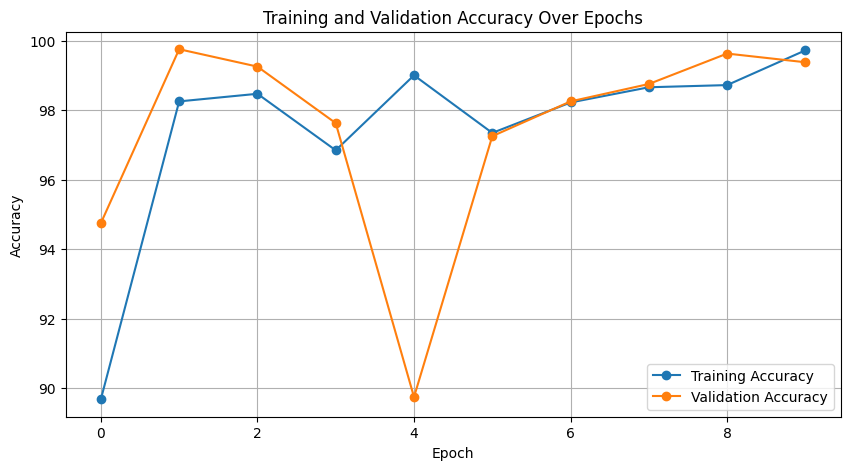

In [10]:
import os
import matplotlib.pyplot as plt

# Visualize training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Accuracy', marker='o', linestyle='-')
plt.plot(val_accuracies, label='Validation Accuracy', marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy Over Epochs')
plt.grid(True)

# Save the plot as a PDF with a correct name
output_dir = r'F:\MangoLeafBD Dataset\Trained images'
os.makedirs(output_dir, exist_ok=True)
save_path = os.path.join(output_dir, 'accuracy_plotk4.pdf')
plt.savefig(save_path, bbox_inches='tight')
plt.show()


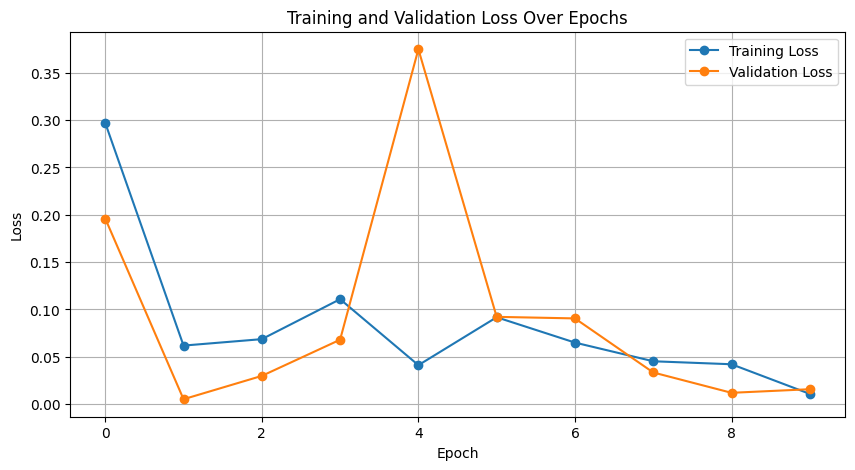

In [11]:
import os
import matplotlib.pyplot as plt

# Visualize training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss', marker='o', linestyle='-')
plt.plot(val_losses, label='Validation Loss', marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Over Epochs')
plt.grid(True)

# Save the plot as a PDF with a correct name
output_dir = r'F:\MangoLeafBD Dataset\Trained images'
os.makedirs(output_dir, exist_ok=True)
save_path = os.path.join(output_dir, 'loss_plotk4.pdf')
plt.savefig(save_path, bbox_inches='tight')
plt.show()



Accuracy: 0.99
                  precision    recall  f1-score   support

     Anthracnose       1.00      0.99      0.99       100
Bacterial Canker       1.00      1.00      1.00       100
  Cutting Weevil       1.00      1.00      1.00       100
        Die Back       0.99      1.00      1.00       100
      Gall Midge       1.00      0.98      0.99       100
         Healthy       0.98      0.99      0.99       100
  Powdery Mildew       0.98      1.00      0.99       100
     Sooty Mould       1.00      0.99      0.99       100

        accuracy                           0.99       800
       macro avg       0.99      0.99      0.99       800
    weighted avg       0.99      0.99      0.99       800



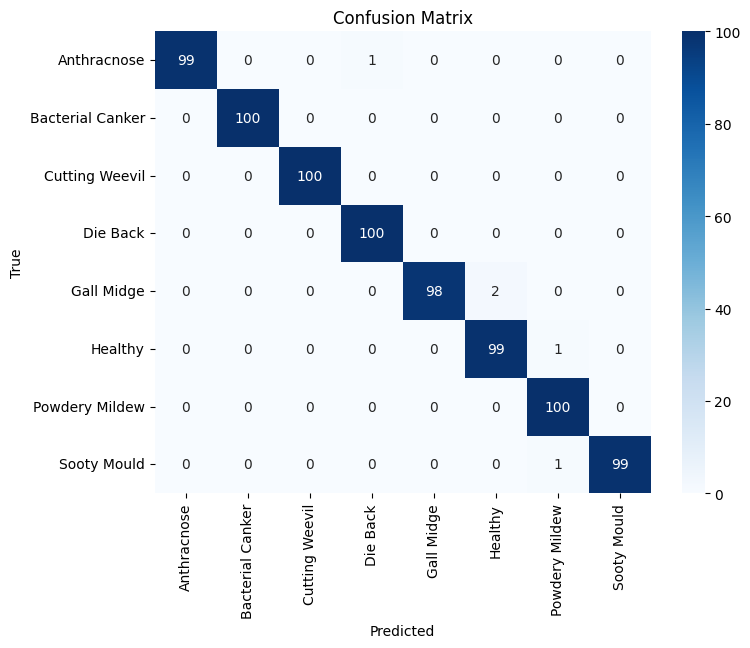

In [12]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluate(model, data_loader, device, class_names, output_dir):
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    # Classification report
    print(classification_report(y_true, y_pred, target_names=class_names))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    
    # Save the plot as a PDF with a correct name
    os.makedirs(output_dir, exist_ok=True)
    save_path = os.path.join(output_dir, 'confusion_matrix.pdf')
    plt.savefig(save_path, bbox_inches='tight')
    plt.show()

# Get the class names (folder names)
class_names = train_dataset.classes

# Directory to save the plot
output_dir = r'F:\MangoLeafBD Dataset\Trained images'

# Evaluate the model on the test set and save the confusion matrix plot
evaluate(model, val_loader_augmented, device, class_names, output_dir)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


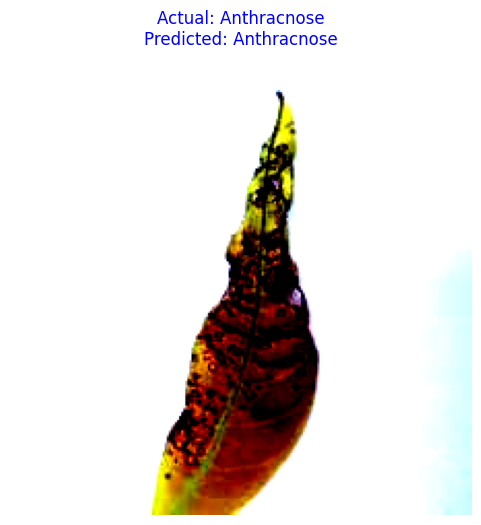

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


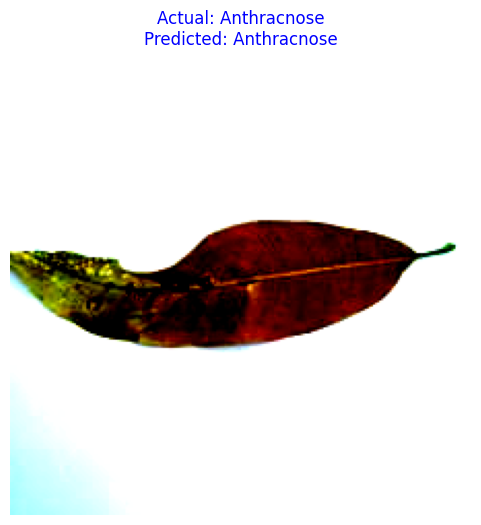

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


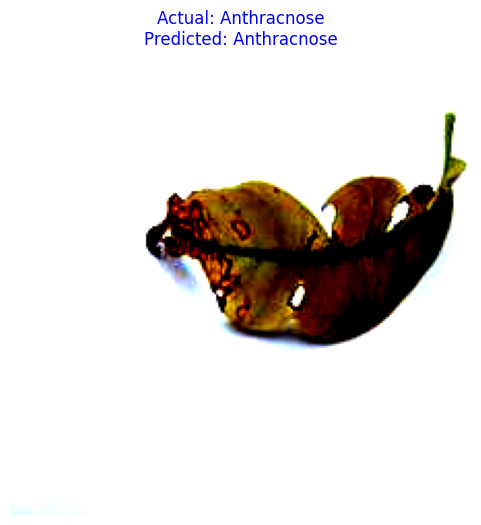

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


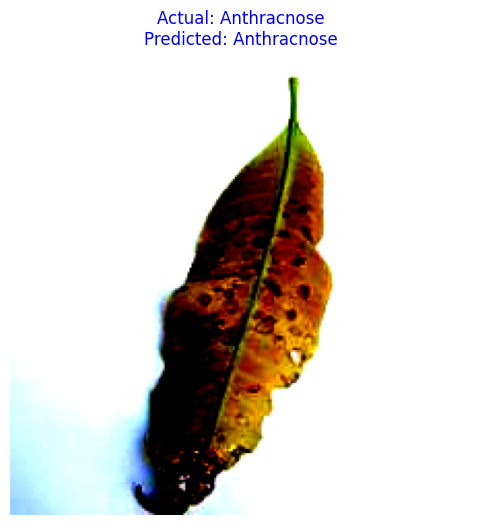

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


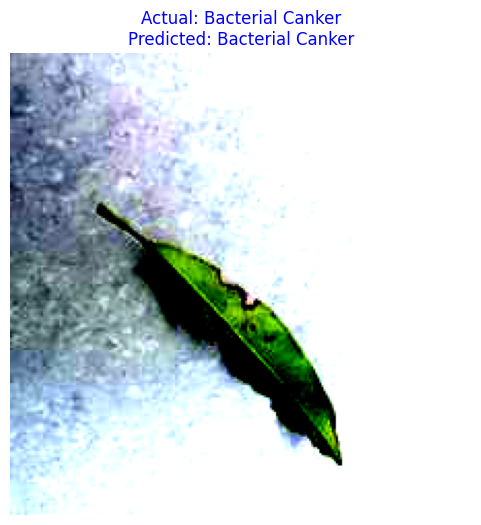

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


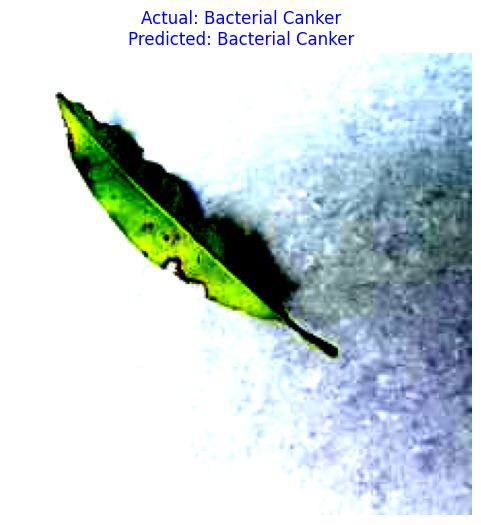

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


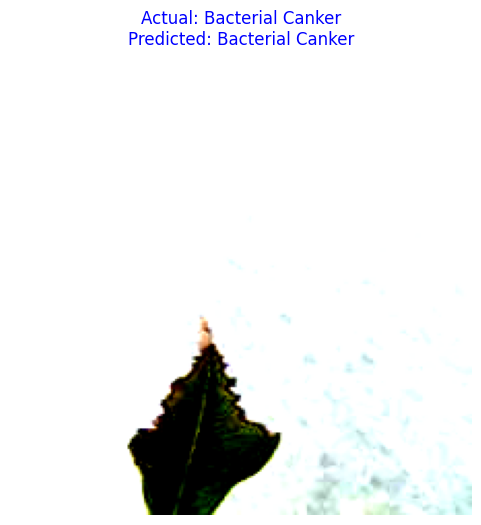

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


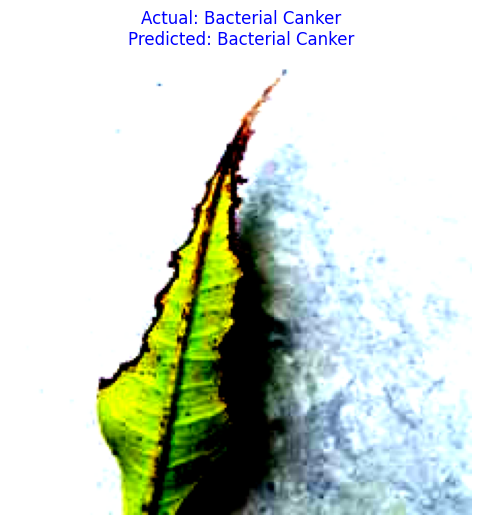

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


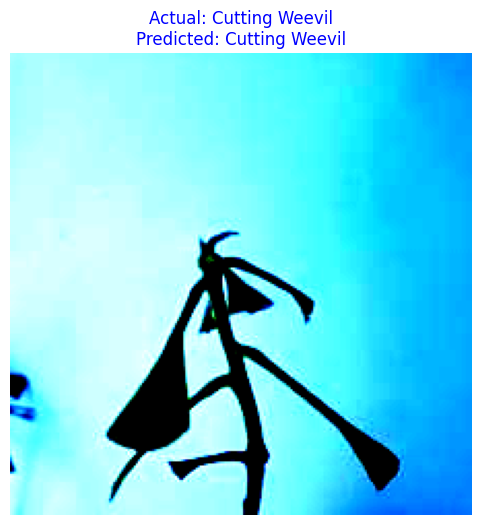

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


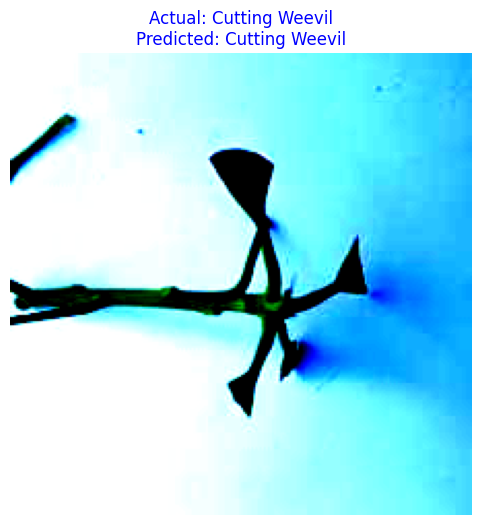

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


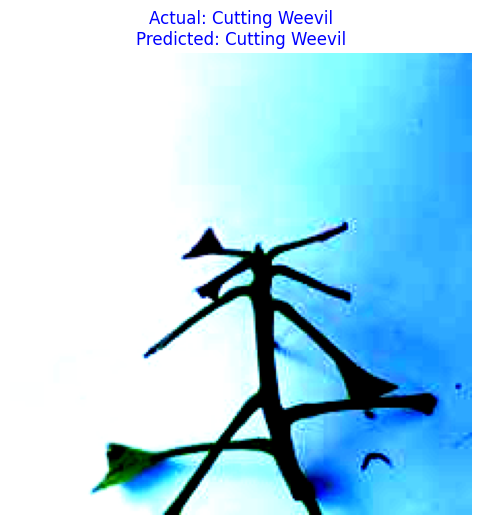

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


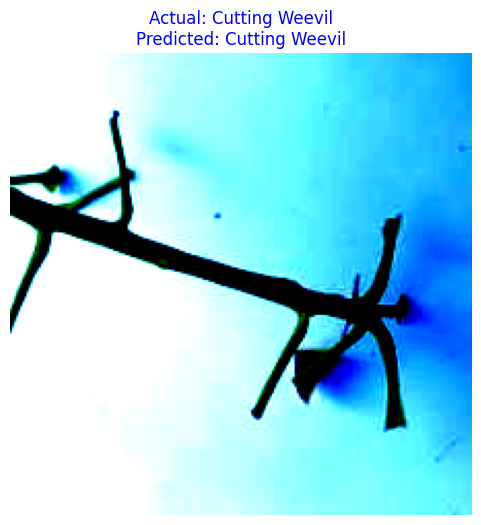

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


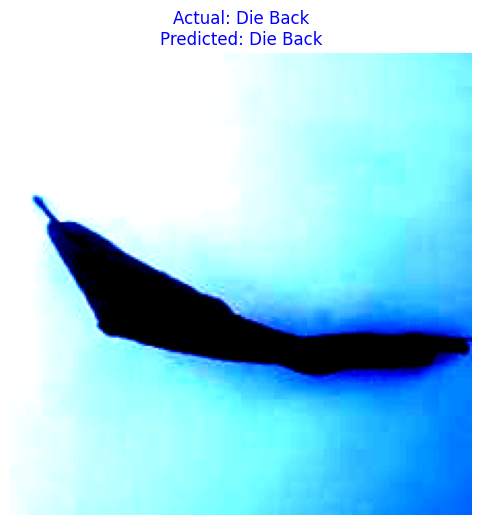

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


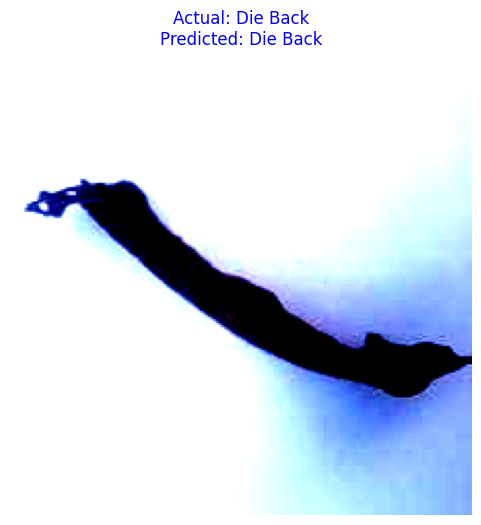

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


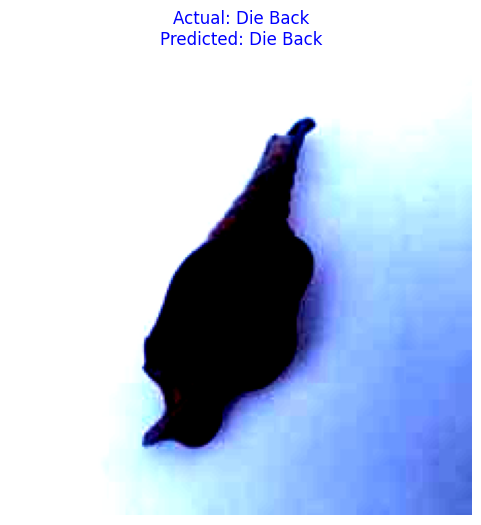

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


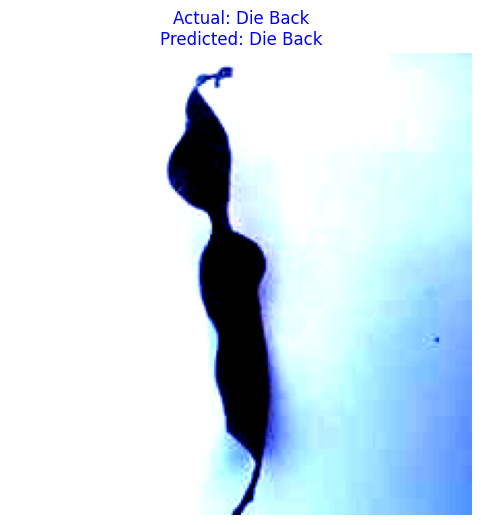

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


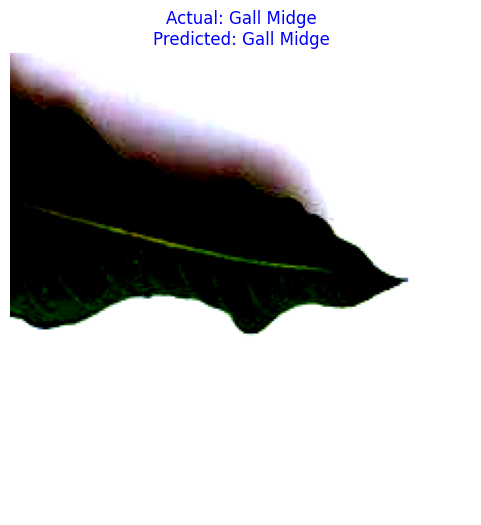

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


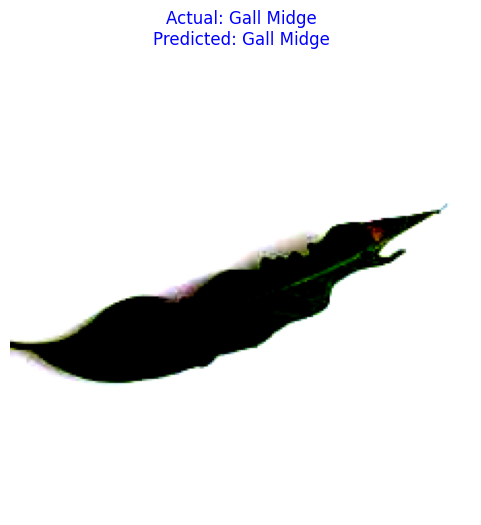

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


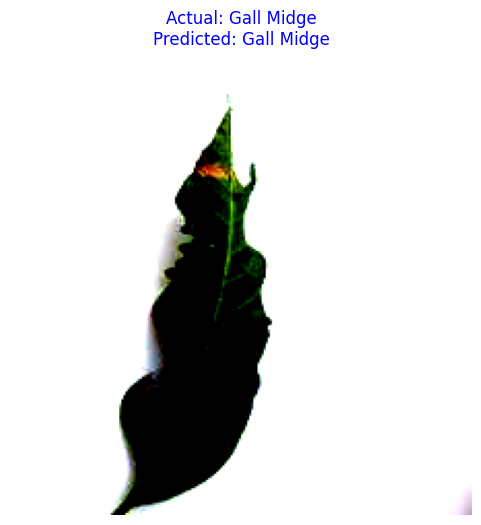

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


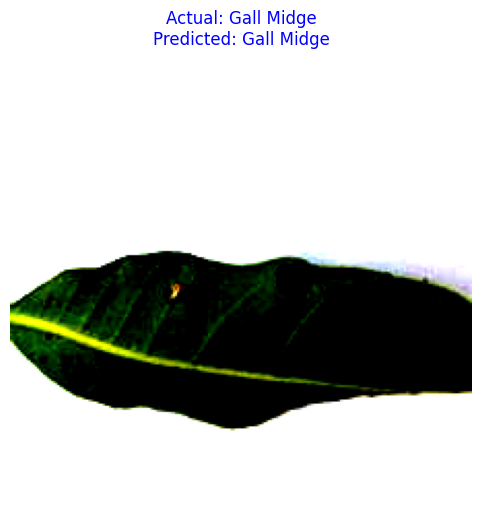

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


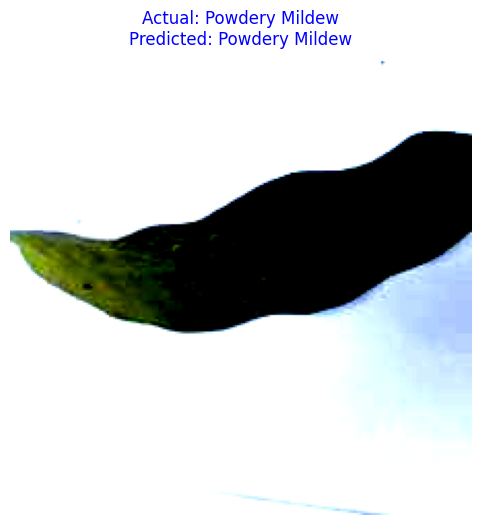

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


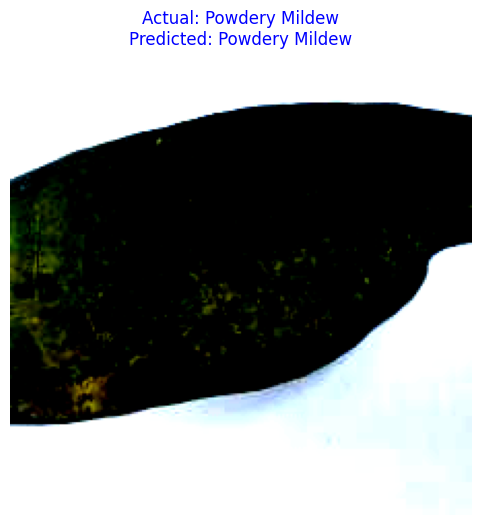

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


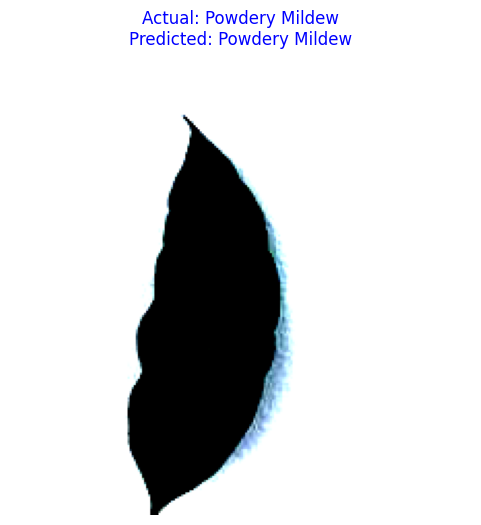

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


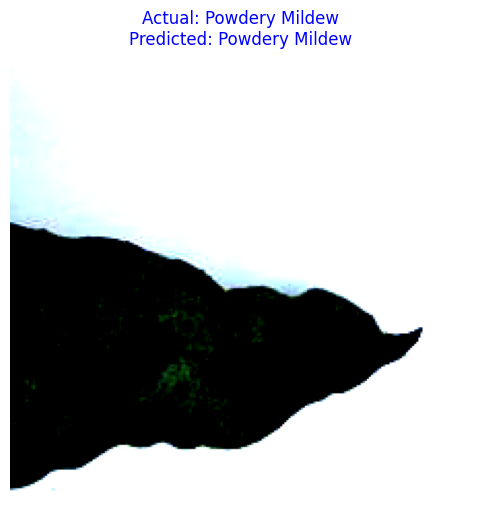

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


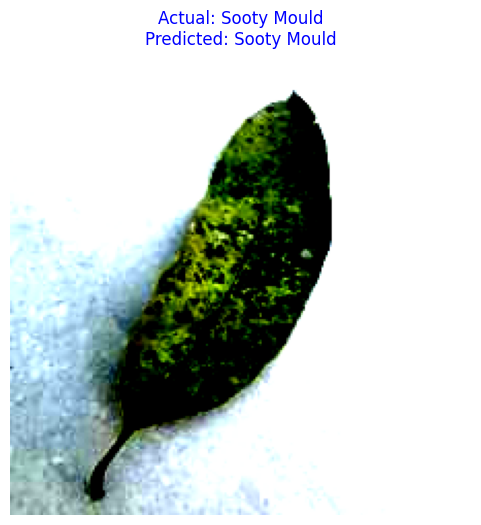

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


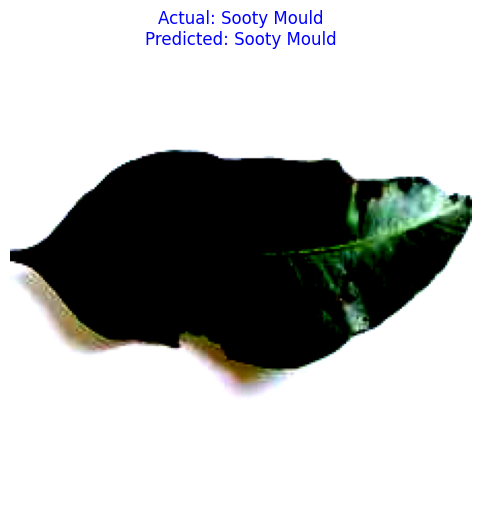

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


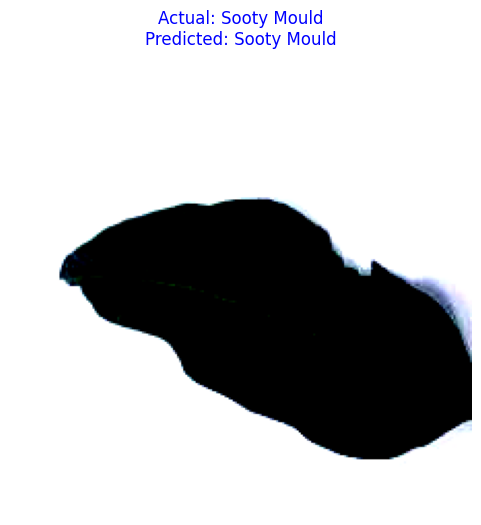

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


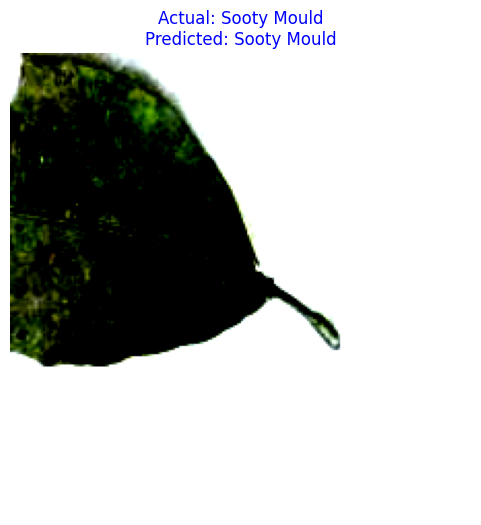

In [13]:
import os
import random
# Assuming you have your PyTorch model loaded and ready
# model = your_loaded_model
class_names = val_dataset.classes


# Calculate the number of classes
num_classes = len(class_names)

# Define the classes excluding 'Healthy'
classes = [class_name for class_name in class_names if class_name != 'Healthy']

# Number of test samples per class
num_samples_per_class = 4

# Create the directory to save the images as PDFs
output_dir = r'F:\MangoLeafBD Dataset\Trained images'
os.makedirs(output_dir, exist_ok=True)

# Loop through the classes and select random test images
# Loop through the classes and select random test images
for i, class_name in enumerate(classes):
    # Get test indices of the current class (excluding 'Healthy')
    test_indices = [j for j, (image, label) in enumerate(val_dataset) if label != train_dataset.class_to_idx['Healthy'] and class_names[label] == class_name]
    random.shuffle(test_indices)
    test_indices = test_indices[:num_samples_per_class]
    
    # Make predictions on the selected test images
    test_images = torch.stack([val_dataset[index][0].to(device) for index in test_indices]).to(device)
    
    # Set the model to evaluation mode (important for models with dropout or batch normalization)
    model.eval()

    # Make predictions on the test data
    with torch.no_grad():
        test_outputs = model(test_images)  # Pass the test data through the model
    
    # Convert the model outputs to probabilities using softmax
    probabilities = torch.nn.functional.softmax(test_outputs, dim=1)

    # Get the predicted class indices
    predicted_class_indices = torch.argmax(probabilities, dim=1).cpu().numpy()
    
    # Visualize and save the results for the current class
    for j, index in enumerate(test_indices):
        plt.figure(figsize=(6, 6))
        
        # Display the test image
        test_image = val_dataset[index][0].cpu().numpy().transpose(1, 2, 0)
        plt.imshow(test_image)
        
        # Get the predicted class index
        predicted_class_index = predicted_class_indices[j]
        
        # Get the true class index
        true_class_index = val_dataset[index][1]
        
        # Get the true class name
        true_class_name = class_names[true_class_index]
        
        # Get the predicted class name
        predicted_class_name = class_names[predicted_class_index]
        
        # Display the true and predicted class names as the title
        plt.title(f'Actual: {true_class_name}\nPredicted: {predicted_class_name}', color='blue', fontsize=12)
        plt.axis('off')
        plt.show()
        

        plt.close()


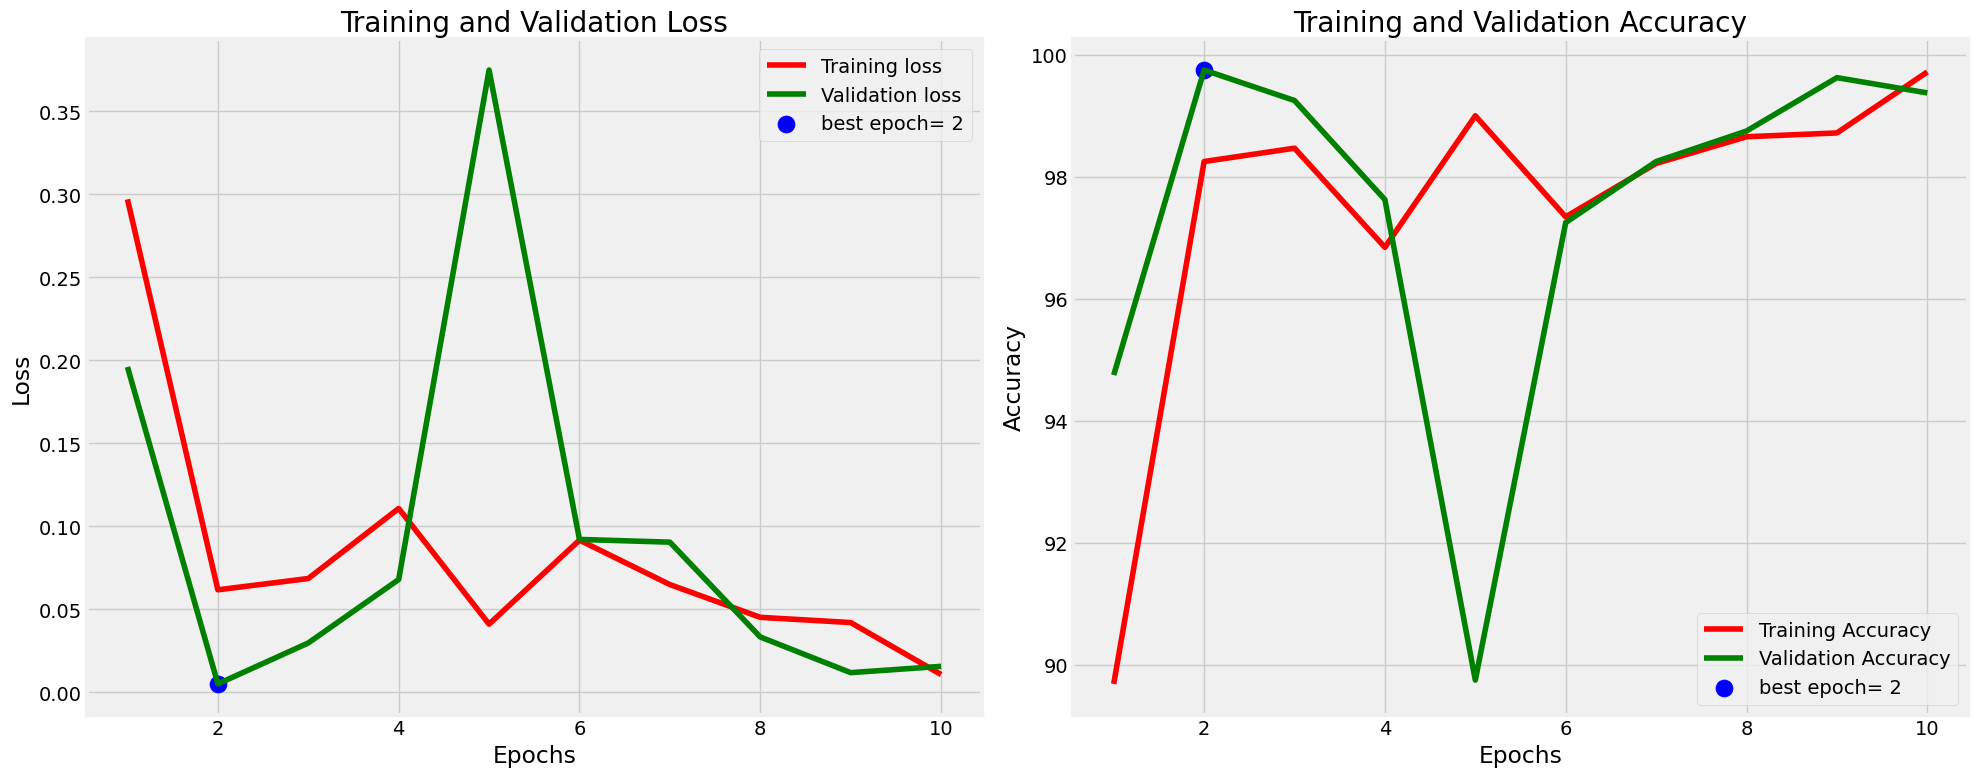

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the following variables already defined
tr_acc = train_accuracies  # Replace with your training accuracy history
tr_loss = train_losses  # Replace with your training loss history
val_acc = val_accuracies  # Replace with your validation accuracy history
val_loss = val_losses  # Replace with your validation loss history
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize=(20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()

# Specify the PDF file path
pdf_path = 'F:\MangoLeafBD Dataset\Trained images\k4.pdf'

# Save the plots as a PDF
plt.savefig(pdf_path, format='pdf')
plt.show()
